In [175]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as ma
#from sympy import *

#init_printing(use_unicode=True)

#%matplotlib inline

In [176]:
k0, k1, a, b = symbols("k0 k1 a b")
print(latex(k0+ k1+ a+ b))

NameError: name 'symbols' is not defined

In [177]:
T1 = Matrix([[k0+k1,k0-k1],[k0-k1,k0+k1]])/(2*k0)
T2 = Matrix([[(k1+k0)*exp_polar(I*a*(k0-k1)), (k1-k0)*exp_polar(-I*a*(k0+k1))],\
             [(k1-k0)*exp_polar(I*a*(k0+k1)), (k1+k0)*exp_polar(-I*a*(k0-k1))]])/(2*k1)
T3 = Matrix([[(k0+k1)*exp_polar(-I*(a+b)*(k0-k1)), (k0-k1)*exp_polar(-I*(a+b)*(k0+k1))],\
             [(k0-k1)*exp_polar(I*(a+b)*(k0+k1)), (k0+k1)*exp_polar(I*(a+b)*(k0-k1))]])/(2*k0)
T4 = Matrix([[(k1+k0)*exp_polar(I*(2*a+b)*(k0-k1)), (k1-k0)*exp_polar(-I*(2*a+b)*(k0+k1))],\
             [(k1-k0)*exp_polar(I*(2*a+b)*(k0+k1)), (k1+k0)*exp_polar(-I*(2*a+b)*(k0-k1))]])/(2*k1)
T1, T2, T3, T4

NameError: name 'Matrix' is not defined

In [178]:
T12 = T1*T2
T123 = T12*T3
Tfinal = T123*T4

NameError: name 'T1' is not defined

In [179]:
#Tfinal
T12_s = simplify(T12)
T12_s

NameError: name 'simplify' is not defined

In [180]:
T12_s[2]

NameError: name 'T12_s' is not defined

In [181]:
Tfinal_s = simplify(Tfinal)
Tfinal_s2 = simplify(Tfinal_s)
Current = Tfinal_s2*16*k0**2*k1**2

NameError: name 'simplify' is not defined

In [182]:
Current

NameError: name 'Current' is not defined

In [183]:
ma.exp(1j)

(0.5403023058681398+0.8414709848078965j)

In [184]:
k0 = 2; k1 = 1; a = 0.00001

In [185]:
res1 = 2*(k0**2-k1**2)*ma.sin(a*k1)
res2 = abs(ma.exp(1j*a*k0)*(k0**2-k1**2)*-2*1j*ma.sin(a*k1))
res1.real, (res2)

(5.9999999999e-05, 5.9999999998999994e-05)

In [186]:
res3 = (k0+k1)**4+(k0-k1)**4+(2*(k0**2-k1**2)**2)*(2*ma.sin(a*k1)-1)
res4 = ma.exp(1j*a*k0)*(((k0+k1)**2)*ma.exp(-1j*a*k1)-((k0-k1)**2)*ma.exp(1j*a*k1))
res3.real, ma.polar(res4)[0]**2

(64.00036, 64.00000000359998)

In [187]:
arr =np.array([[1,0,0],[0,1,0],[0,0,1]])
arr2 = np.array([[3,4,5],[6,7,8],[1,3,2]])

In [188]:
np.matmul(arr,arr2)

array([[3, 4, 5],
       [6, 7, 8],
       [1, 3, 2]])

In [189]:
type(1j)

complex

In [190]:
rho0 = 100
rho1 = 50
a = 0.01
b = 0.01
w = 1
T = 100
j = 1
i = 1j
T_2 = ma.sqrt(T)
w_t = w/T_2
rho0_2 = ma.sqrt(rho0)
rho1_2 = ma.sqrt(rho1)
rho_diff = rho0_2-rho1_2
rho_sum = rho0_2+rho1_2
M10 = np.array(\
               [\
                [rho_sum*ma.exp(i*w_t*rho_diff*((a+b)*j+a)), rho_diff*ma.exp(-i*w_t*rho_sum*((a+b)*j+a))],\
                [rho_diff*ma.exp(i*w_t*rho_sum*((a+b)*j+a)), rho_sum*ma.exp(-i*w_t*rho_diff*((a+b)*j+a))]\
               ]\
               ,complex)/(2*rho1_2)
M01 = np.array(\
               [\
                [rho_sum*ma.exp(i*w_t*rho_diff*(a+b)*j), rho_diff*ma.exp(-i*w_t*rho_sum*(a+b)*j)],\
                [rho_diff*ma.exp(i*w_t*rho_sum*(a+b)*j), rho_sum*ma.exp(-i*w_t*rho_diff*(a+b)*j)]\
               ]\
               ,complex)/(2*rho0_2)

In [191]:
T_arr=np.array([])
M_res = np.identity(2,complex)
omega = np.linspace(-4, 4*ma.pi, num=100)
N = 1

for w in omega:
    w_t = w/T_2
    M_res = np.identity(2,complex)
    for j in range(N):
        M10 = np.array(\
               [\
                [rho_sum*ma.exp(i*w_t*rho_diff*((a+b)*j+a)), rho_diff*ma.exp(-i*w_t*rho_sum*((a+b)*j+a))],\
                [rho_diff*ma.exp(i*w_t*rho_sum*((a+b)*j+a)), rho_sum*ma.exp(-i*w_t*rho_diff*((a+b)*j+a))]\
               ]\
               ,complex)/(2*rho1_2)
        M01 = np.array(\
               [\
                [rho_sum*ma.exp(i*w_t*rho_diff*(a+b)*j), rho_diff*ma.exp(-i*w_t*rho_sum*(a+b)*j)],\
                [rho_diff*ma.exp(i*w_t*rho_sum*(a+b)*j), rho_sum*ma.exp(-i*w_t*rho_diff*(a+b)*j)]\
               ]\
               ,complex)/(2*rho0_2)
        new = np.matmul(M01,M10)
        M_res = np.matmul(M_res,new)
    T_arr = np.append(T_arr,1/ma.polar(M_res[0,0])[0]**2)



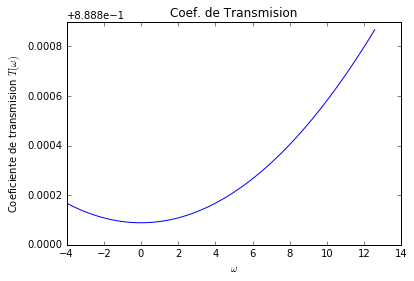

In [192]:
plot = plt.plot(omega,T_arr)
plt.xlabel("$\omega$")
plt.ylabel("Coeficiente de transmision $T(\omega)$")
plt.title("Coef. de Transmision")